<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 1, Unit 2 (Assignment) --  Recap Hands-on AI I </h2>

# Exercise 0

- Import the same modules as discussed in the lecture notebook
- Check if your model versions are correct

In [1]:
import u1_utils as u1
import seaborn as sns

import u2_utils as u2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import xgboost as xgb

from functools import partial
from IPython.display import HTML
from pathlib import Path
from PIL import Image, ImageOps
from scipy import signal
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from torch.utils.data import DataLoader, TensorDataset


In [7]:
u2.check_module_versions()
# I have installed Python 3.6.9 and Python 3.7.5. Somehow the notebook doesn't recognize it...


Installed Python version: 3.6 (✗)
Installed numpy version: 1.18.2 (✓)
Installed pandas version: 1.0.3 (✓)
Installed PyTorch version: 1.3.1+cpu (✓)
Installed scikit-learn version: 0.22.2.post1 (✓)
Installed scipy version: 1.4.1 (✓)
Installed matplotlib version: 3.2.0 (✓)
Installed seaborn version: 0.10.0 (✓)
Installed PIL version: 6.2.1 (✓)


# Exercise 1

- Load the Fashion MNIST dataset.
- Display the first 5 elements of the dataset.
- Create a training and a test dataset (ratio 7:3)
- Print the size of the full data set, the size of the training data set and the size of the test data set

In [60]:
fashion_mnist_data = u2.load_fashion_mnist()


In [61]:
np.random.seed(42)
a = fashion_mnist_data[1:6]

fashion_mnist_train, fashion_mnist_test = u2.split_data(fashion_mnist_data, test_size=0.30)

print(f'Full data set is of size: {fashion_mnist_data.shape[0]}')
print(f'Training subset is of size: {fashion_mnist_train.shape[0]}')
print(f'Testing subset is of size: {fashion_mnist_test.shape[0]}')

a


Full data set is of size: 70000
Training subset is of size: 49000
Testing subset is of size: 21000


,PX_0,PX_1,PX_2,PX_3,PX_4,PX_5,PX_6,PX_7,PX_8,PX_9,...,PX_775,PX_776,PX_777,PX_778,PX_779,PX_780,PX_781,PX_782,PX_783,item_type
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,0.0,133.0,167.0,73.0,0.0,0.0,0.0,2


# Exercise 2

- Downproject the training data to two dimensions 
- Visualize the ten classes in this downprojection
- For the remaining exercise create two data sets (fashion_mnist_train_pca, fashion_mnist_test_pca) which are downprojected versions of the original dataset. NOTA BENE: the downprojected dimension should be 10 now!

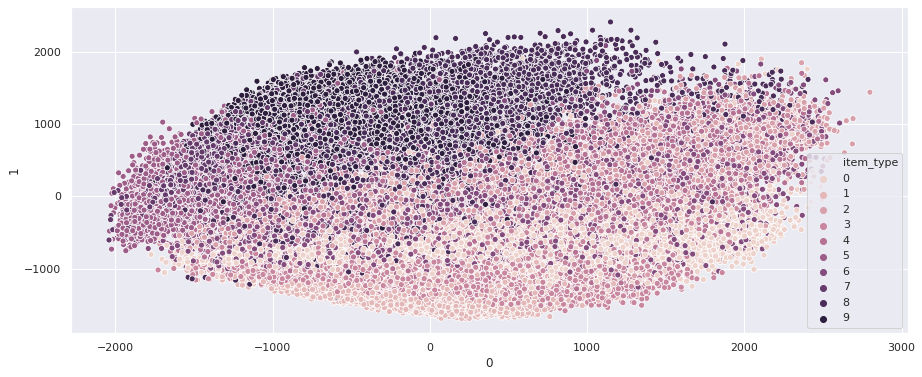

In [19]:
np.random.seed(seed=42)
fashion_mnist_train1_pca = u2.apply_pca(n_components=2, data=fashion_mnist_train, target_column=r'item_type')
u2.plot_points_2d(data=fashion_mnist_train1_pca, target_column=r'item_type', figsize=(15, 6))


In [20]:
np.random.seed(seed=42)
fashion_mnist_train_pca = u2.apply_pca(n_components=10, data=fashion_mnist_train, target_column=r'item_type')
fashion_mnist_test_pca = u2.apply_pca(n_components=10, data=fashion_mnist_test, target_column=r'item_type')


# Exercise 3

- Run the $k$-nearest neighbor classifier for $k$ = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512 
- Report the results on the test dataset, what do you observe?
- Run the Naive Bayes classifier and report the results on the training and on the test dataset

In [25]:
np.random.seed(42)
k_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
for n_neighbors in k_range:
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    knn_classifier.fit(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
    knn_score = knn_classifier.score(fashion_mnist_test_pca.drop(columns=r'item_type'), fashion_mnist_test_pca[r'item_type'])
    print(f'Score (k = {str(n_neighbors).zfill(len(str(max(k_range))))}): {knn_score}')
    

Score (k = 001): 0.6396666666666667
Score (k = 002): 0.6391428571428571
Score (k = 004): 0.6756666666666666
Score (k = 008): 0.6932380952380952
Score (k = 016): 0.6930952380952381
Score (k = 032): 0.6898571428571428
Score (k = 064): 0.6825238095238095
Score (k = 128): 0.6730952380952381
Score (k = 256): 0.6640952380952381
Score (k = 512): 0.6564761904761904


For k=8 and k=16 the results are the highest ones (circa 0.69). However, this two values are also the peaks. After them when the k is higher (32,64,128,256,512) the score slowly decreases more and more. The final value of circa. 0.66 for k=512 is smaller than the value of k=4 (circa 0.68). That shows us that a overfitting takes place. The best values may lay between k=5 and k=31.

In [32]:
np.random.seed(42)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
naive_bayes_score = naive_bayes_classifier.score(fashion_mnist_test_pca.drop(columns=r'item_type'), fashion_mnist_test_pca[r'item_type'])
print(f'Score of test dataset:  {naive_bayes_score}')

naive_bayes_score2 = naive_bayes_classifier.score(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
print(f'Score of train dataset: {naive_bayes_score2}')


Score of test dataset:  0.6312857142857143
Score of train dataset: 0.7041428571428572


# Exercise 4

- Run the Random Forest classifier for $k$ = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512 
- Report the results on the test dataset, what do you observe?
- Run the XGBoost classifier and report the results on the training and on the test dataset

In [33]:
np.random.seed(42)
n_estimator_range = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
for n_estimator in n_estimator_range:
    random_forest_classifier = RandomForestClassifier(n_estimators=n_estimator, n_jobs=-1)
    random_forest_classifier.fit(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
    random_forest_score = random_forest_classifier.score(fashion_mnist_test_pca.drop(columns=r'item_type'), fashion_mnist_test_pca[r'item_type'])
    print(f'Score (n = {str(n_estimator).zfill(len(str(max(n_estimator_range))))}): {random_forest_score}')
    

Score (n = 001): 0.5394285714285715
Score (n = 002): 0.47795238095238096
Score (n = 004): 0.6126666666666667
Score (n = 008): 0.6822380952380952
Score (n = 016): 0.7039047619047619
Score (n = 032): 0.7168095238095238
Score (n = 064): 0.7308571428571429
Score (n = 128): 0.7387142857142858
Score (n = 256): 0.7411428571428571
Score (n = 512): 0.7383809523809524


The highest scores are reached by n>=64. Before, most time the score increases with the n. When n>=64 the score values stagnate more or less. At n=256 the highest score with circa 0.74 is reached. 

In [35]:
np.random.seed(42)
xgboost_classifier = xgb.XGBClassifier(max_depth=7, min_child_weight=1, learning_rate=0.1, n_estimators=192, silent=True, objective=r'binary:logistic',
                                       gamma=0, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=0,
                                       scale_pos_weight=1, seed=1, missing=None)
xgboost_classifier.fit(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
xgboost_score = xgboost_classifier.score(fashion_mnist_test_pca.drop(columns=r'item_type'), fashion_mnist_test_pca[r'item_type'])
print(f'Score for test set: {xgboost_score}')

xgboost_score2 = xgboost_classifier.score(fashion_mnist_train_pca.drop(columns=r'item_type'), fashion_mnist_train_pca[r'item_type'])
print(f'Score for training set: {xgboost_score2}')


Score for test set: 0.6878095238095238
Score for training set: 0.9462448979591837


# Exercise 5

- Write a Python function for the following function (which gets a Weierstrass function for $n\rightarrow\infty$):
\begin{align}
    &f(x) = \sum_{n=1}^{55} \frac{2^k \sin(2^k x)}{3^k}
\end{align}

- Plot the function. Additionally, generate 300 random samples and evaluate the function in the same plot.
- Fit the function with the polynomials of degree 5, 10, 20, 50, 100. Which polynomial describes the data best? (DISCUSS) Plot all the information in one plot.

In [33]:
def function(x=float, k = int):

    return np.sum([(np.power(2, k) * (np.sin(np.power(2, k) * x)) / np.power(3, k)) for k in range(1,55)], axis=0)


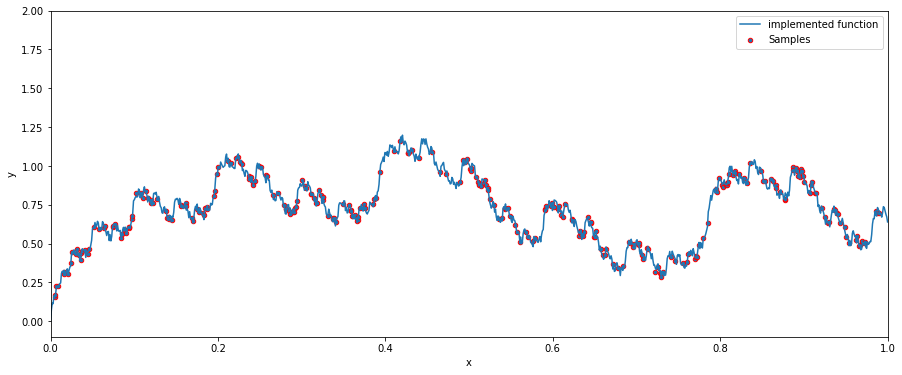

In [55]:
# your plot of random generated samples and the evaluation of the Weierstrass-like function goes here

x = np.sort(np.random.rand(300)) # Here random samples generated # Precondition: random.seed(42)
y = function(x=x)

# Plot function.
fig = plt.figure(figsize=(15, 6))
function_range = np.linspace(0, 1, 1000)
plt.plot(function_range, function(x=function_range), label=r'implemented function')
plt.scatter(x, y, edgecolor=r'r', s=20, label=r'Samples')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.xlim((0, 1))
plt.ylim((-0.1, 2))
plt.legend(loc="best")
plt.show()


#Evaluation:
#As you can see the samples aren't lay on the implemented function very often. The form of the function (sin())
#seems to fit but it would be better when the function would be shifted and deformed.



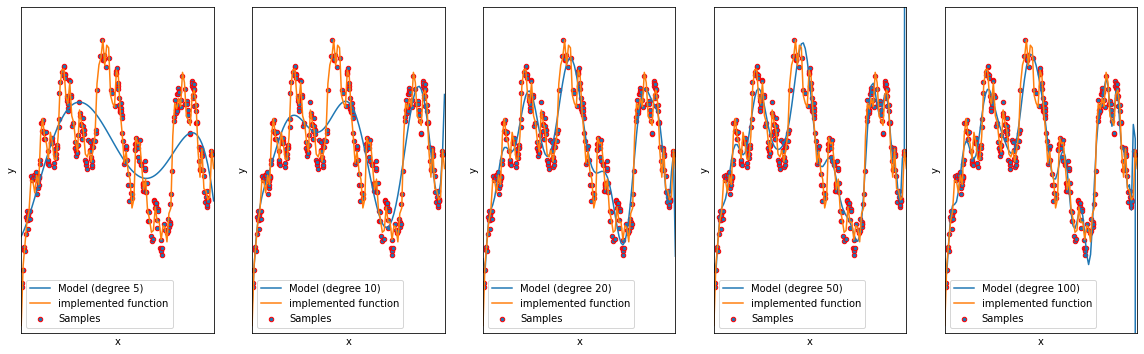

In [36]:
np.random.seed(42)
degrees = [5, 10, 20, 50, 100]
plt.figure(figsize=(20, 6))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # Fit a polynomial with respect to our sample data.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([(r'polynomial_features', polynomial_features),
                         (r'linear_regression', linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)

    # Create subplot and show result of currently fitted model.
    function_range = np.linspace(0, 1, 100)
    label = f'Model (degree {degrees[i]})'
    plt.plot(function_range, pipeline.predict(function_range[:, np.newaxis]),label=label)
    plt.plot(function_range, function(function_range), label=r'implemented function')
    plt.scatter(x, y, edgecolor=r'r', s=20, label=r'Samples')
    plt.xlabel(r'x')
    plt.ylabel(r'y')
    plt.xlim((0, 1))
    plt.ylim((-0.03, 1.3))
    plt.legend(loc=r'best')
plt.show()


I would choose the model with the degree of 20 because it looks very similar to the models with 50 and 100 as degree but in contrast there is a smaller change of overfitting. The models with degree 5 underfits and the model with a degree of 10 isn't precise enough.

Discussing what will happen if you put all the information in one plot: <br> For a human it would be very difficult to distinguish between the four mddels even if the graphs are different coloured. It is easier to make a picuture of the situation when you plot each model separated.

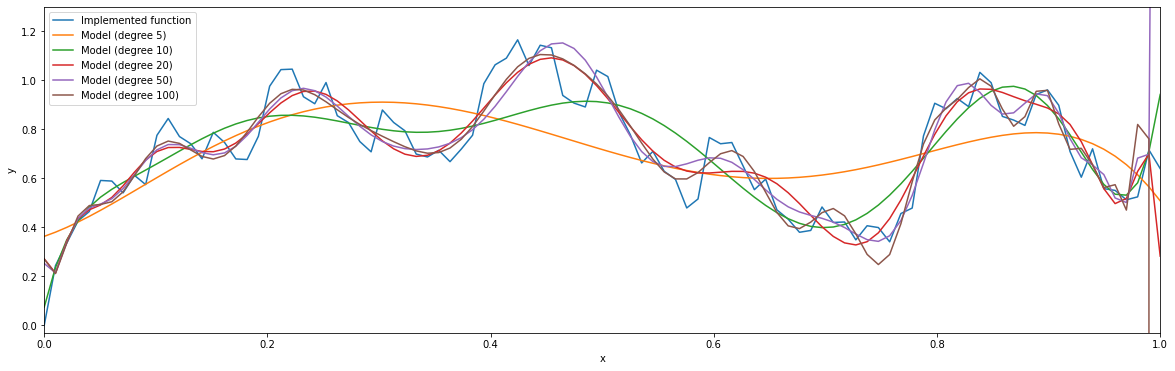

In [37]:
np.random.seed(42)
degrees = [5, 10, 20, 50, 100]
plt.figure(figsize=(20, 6))
function_range = np.linspace(0,1,100)
plt.plot(function_range, function(function_range), label=r'Implemented function')
for i in range(len(degrees)):

    # Fit a polynomial with respect to our sample data.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([(r'polynomial_features', polynomial_features),
                         (r'linear_regression', linear_regression)])
    pipeline.fit(x[:, np.newaxis], y)

    # Create subplot and show result of currently fitted model.
    label = f'Model (degree {degrees[i]})'
    plt.plot(function_range, pipeline.predict(function_range[:, np.newaxis]),label=label)
    plt.xlabel(r'x')
    plt.ylabel(r'y')
    plt.xlim((0, 1))
    plt.ylim((-0.03, 1.3))
    plt.legend(loc=r'best')
plt.show()


# Exercise 6

- Read in the image 'horse.jpg' and turn it into a greyscale image
- Apply the following filters:
\begin{equation}G_x = \left( 
    \begin{array}{rrrrr}                                
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2 \\
        -2 & -1 & 0.0 & 1 & 2
    \end{array}\right)
\end{equation}

\begin{equation}G_y = \left( 
    \begin{array}{rrrrr}                                
         -2 &  -2 &  -2 &  -2  &  -2  \\
         -1 &  -1 &  -1 &  -1  &  -1  \\
        0.0 & 0.0 & 0.0 & 0.0  & 0.0  \\
          1 &   1 &   1 &   1  &   1  \\
          2 &   2 &   2 &   2  &   2
    \end{array}\right)
\end{equation}

- Apply the ReLU activation function to "switch" pixels on and off
- Make a max pool operation with kernel-size 8
- Make 7 plots: the greyscale image, an image with $G_x$ applied, an image with $G_y$ applied, an image with $G_x$+ReLU, an iamge with $G_y$+ReLU, an image with $G_x$+ReLU+maxpool, and an iamge with $G_y$+ReLU+maxpool

In [3]:
image_path = r'resources/horse.jpg'
with Image.open(image_path) as image_data:
    image_horse = ImageOps.grayscale(image_data)
    

In [52]:
# your kernels/filters go here

custom_kernel_x = np.array([[-2.0,-1.0,0.0,1.0,2.0],[-2.0,-1.0,0.0,1.0,2.0],[-2.0,-1.0,0.0,1.0,2.0],[-2.0,-1.0,0.0,1.0,2.0],[-2.0,-1.0,0.0,1.0,2.0]])
custom_kernel_y = np.array([[-2.0,-2.0,-2.0,-2.0,-2.0],[-1.0, -1.0, -1.0,-1.0,-1.0], [0.0, 0.0, 0.0,0.0,0.0], [1.0,1.0,1.0,1.0,1.0],[2,2,2,2,2]])


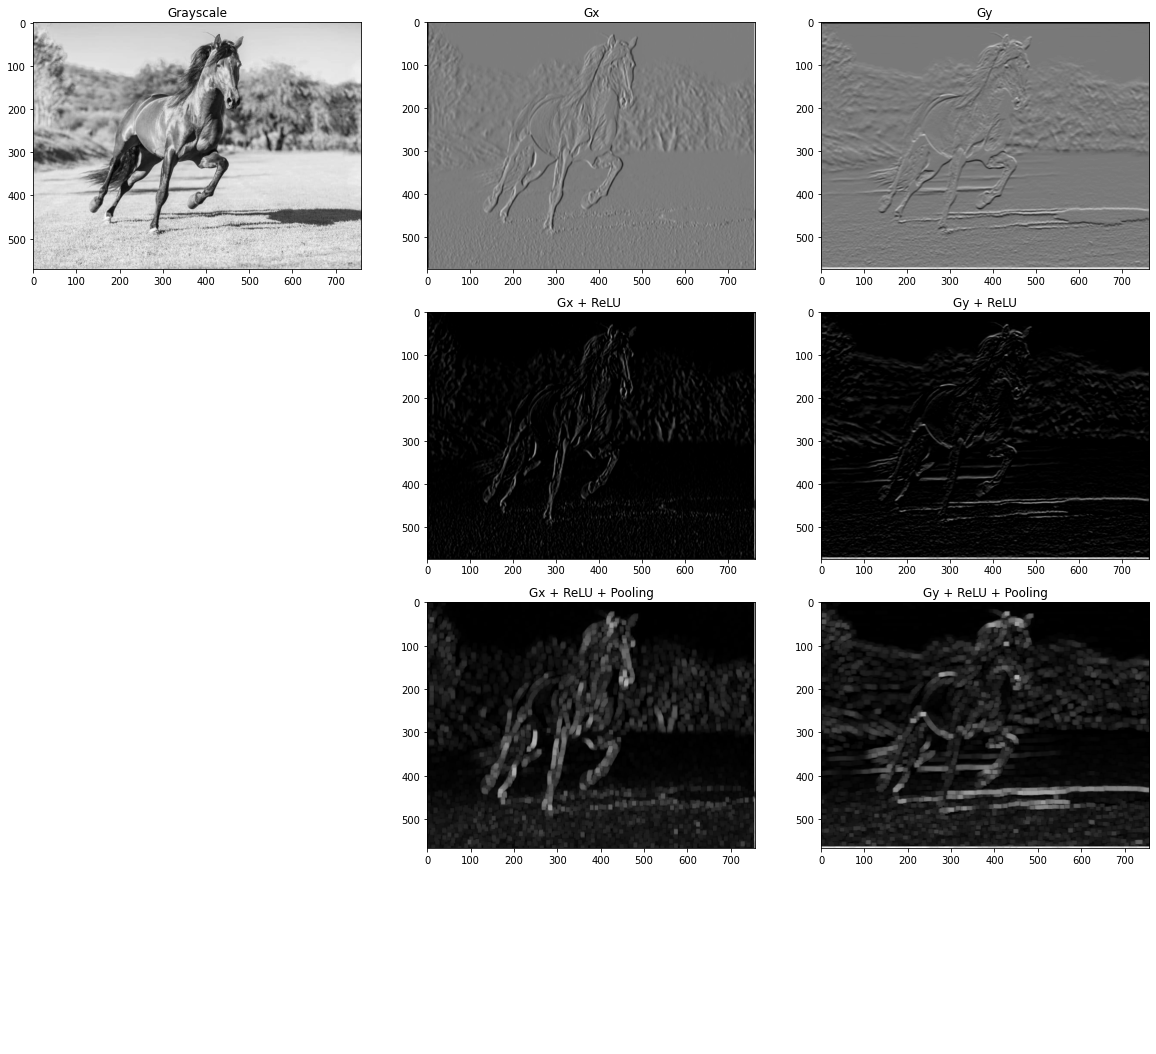

In [72]:
image_path = r'resources/horse.jpg'
with Image.open(image_path) as image_data:
    image_horse = ImageOps.grayscale(image_data)
    
fig, ax = plt.subplots(3, 3, figsize=(20, 22.5))
plt.subplots_adjust(hspace=-0.55)
ax[1, 0].axis(r'off')
ax[2, 0].axis(r'off')
ax[0, 0].set_title(r'Grayscale')
ax[0, 1].set_title(r'Gx')
ax[0, 2].set_title(r'Gy')
ax[1, 1].set_title(r'Gx + ReLU ')
ax[1, 2].set_title(r'Gy + ReLU')
ax[2, 1].set_title(r'Gx + ReLU + Pooling')
ax[2, 2].set_title(r'Gy + ReLU + Pooling')

_ = ax[0, 0].imshow(image_horse, cmap=r'gray')


filtered_horse_x = signal.convolve2d(np.array(image_horse), custom_kernel_x)
activated_horse_x = torch.relu(torch.tensor(filtered_horse_x))

_ = ax[0, 1].imshow(filtered_horse_x, cmap=r'gray')
_ = ax[1, 1].imshow(activated_horse_x, cmap=r'gray')

reshaped_horse_x = activated_horse_x.unsqueeze(0).unsqueeze(0)                # Gx, Relu, pooling
pooled_horse_x = torch.max_pool2d(reshaped_horse_x, kernel_size=8, stride=1)
_ = ax[2, 1].imshow(pooled_horse_x.squeeze(), cmap=r'gray')

filtered_horse_y = signal.convolve2d(np.array(image_horse), custom_kernel_y)
activated_horse_y = torch.relu(torch.tensor(filtered_horse_y))
_ = ax[0, 2].imshow(filtered_horse_y, cmap=r'gray')
_ = ax[1, 2].imshow(activated_horse_y, cmap=r'gray')

reshaped_horse_y = activated_horse_y.unsqueeze(0).unsqueeze(0)                 # Gy, Relu, pooling
pooled_horse_y = torch.max_pool2d(reshaped_horse_y, kernel_size=8, stride=1)
_ = ax[2, 2].imshow(pooled_horse_y.squeeze(), cmap=r'gray')


# Exercise 7

- Implement the following convolutional network architecture: <br>
1) one convolutional layer with 10 kernels and kernel size of 5 <br>
2) a ReLU activation function <br>
3) one pooling layer with which max pools out of 2 times 2 pixels <br>
4) one convolutional layer with 20 kernels and kernel size of 5 <br>
5) a ReLU activation function <br>
6) one pooling layer with which max pools out of 2 times 2 pixels <br>
7) one fully connected layer with 200 output units <br>
8) a ReLU activation function <br>
9) one fully connected layer with 200 input units and 10 output units <br><br>

- Run your CNN on the complete Fashion MNIST dataset for 5 epochs
- Report your results on the training set after each epoch
- Run you final model on the test set, also report you results

In [16]:
class your_CNN(nn.Module):
    
    def __init__(self):
        super(your_CNN, self).__init__()
        
        # your layers go here 
        
        # 1) here: only one channel, 10 out channels/kernels, kernel size of 5:
        self.conv1 = nn.Conv2d(1, 10, 5)
        # 4): before 10 output channels --> 10 input channels:
        self.conv2 = nn.Conv2d(10, 20, 5)
        # 7):
        self.fc1 = nn.Linear(20*4*4, 200)
        # 9):
        self.fc2 = nn.Linear(200, 10)
    def forward(self, x):
        
        # your forward pass goes here
        
        # 2) Size (1,28,28) changes because of kernel size =5 and output channels = 10 --> (10,24,24)
        x = torch.relu(self.conv1(x))
        # 3) (10,24,24) changes to (10,12,12)
        x = torch.max_pool2d(x, 2, 2)
        # 5) Size (10,12,12) changes because of kernel size = 5 and outputchannels = 20 --> (20, 8, 8):
        x = torch.relu(self.conv2(x))
        # 6) Size changes from (20,8,8) to (20,4,4):
        x = torch.max_pool2d(x, 2, 2)
        # 7):
        x = x.view(-1, 20*4*4)
        # 8):
        x = torch.relu(self.fc1(x))
        # 9):
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)
    

In [21]:
image_width = int(np.sqrt(len(fashion_mnist_train.iloc[0])))

# Create instance of Dataloader (training set).
fashion_mnist_loader_train = DataLoader(TensorDataset(
    torch.from_numpy(fashion_mnist_train.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(fashion_mnist_train), 1, image_width, image_width),
    torch.from_numpy(fashion_mnist_train[r'item_type'].values.astype(dtype=np.long))
), batch_size=128, shuffle=True, drop_last=False)

# Create instance of Dataloader (test set).
fashion_mnist_loader_test = DataLoader(TensorDataset(
    torch.from_numpy(fashion_mnist_test.drop(columns=[r'item_type']).values.astype(
        dtype=np.float32)).unsqueeze(1).reshape(len(fashion_mnist_test), 1, image_width, image_width),
    torch.from_numpy(fashion_mnist_test[r'item_type'].values.astype(dtype=np.long))
), batch_size=128, shuffle=False, drop_last=False)


In [25]:
np.random.seed(42)
torch.manual_seed(42)

target_device = torch.device(r'cuda' if torch.cuda.is_available() else r'cpu')
cnn_model = your_CNN().to(target_device)
optimizer = optim.Adam(cnn_model.parameters(), lr=1e-3)

# your training and evaluation goes here

# Train and evaluate CNN on Fashion-MNIST data.
num_epochs = 5
for epoch in range(num_epochs):
    
    # Train CNN for one epoch.
    u2.train_network(model=cnn_model, data_loader=fashion_mnist_loader_train,
                     device=target_device, optimizer=optimizer)
    
    # Evaluate current CNN model on training data set.
    performance = u2.test_network(
        model=cnn_model, data_loader=fashion_mnist_loader_train, device=target_device)
    
    # Print result of current epoch to standard out.
    print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
          f'/ Loss: {performance[0]:.4f} / Accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u2.test_network(
    model=cnn_model, data_loader=fashion_mnist_loader_train, device=target_device)
print(f'\nFinal loss: {performance[0]:.4f} / Final accuracy for train set: {performance[1]:.4f}')


Epoch: 1 / Loss: 0.0029 / Accuracy: 0.8649
Epoch: 2 / Loss: 0.0026 / Accuracy: 0.8800
Epoch: 3 / Loss: 0.0020 / Accuracy: 0.9047
Epoch: 4 / Loss: 0.0018 / Accuracy: 0.9133
Epoch: 5 / Loss: 0.0017 / Accuracy: 0.9201

Final loss: 0.0017 / Final accuracy for train set: 0.9201


For training epoch 5 is reached the highest accuracy with 0.9201.<br>
In the first training epoch is the lowest accuracy with 0.8649.<br>
The values of accuracy are strictly increasing with the number of training epochs until the fifth.

In [26]:
num_epochs = 5
for epoch in range(num_epochs):
    
    # Train CNN for one epoch.
    u2.train_network(model=cnn_model, data_loader=fashion_mnist_loader_train,
                     device=target_device, optimizer=optimizer)
    
    # Evaluate current CNN model on training data set.
    performance = u2.test_network(
        model=cnn_model, data_loader=fashion_mnist_loader_train, device=target_device)
    
    # Print result of current epoch to standard out.
    print(f'Epoch: {str(epoch + 1).zfill(len(str(num_epochs)))} ' +
          f'/ Loss: {performance[0]:.4f} / Accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u2.test_network(
    model=cnn_model, data_loader=fashion_mnist_loader_test, device=target_device)
print(f'\nFinal loss: {performance[0]:.4f} / Final accuracy for test set: {performance[1]:.4f}')


Epoch: 1 / Loss: 0.0016 / Accuracy: 0.9223
Epoch: 2 / Loss: 0.0015 / Accuracy: 0.9288
Epoch: 3 / Loss: 0.0014 / Accuracy: 0.9330
Epoch: 4 / Loss: 0.0014 / Accuracy: 0.9350
Epoch: 5 / Loss: 0.0013 / Accuracy: 0.9352

Final loss: 0.0029 / Final accuracy for test set: 0.8815


Here are also high accuracies reached. Furthermore, the comments are the same as above. 